In [16]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 23 18:02:22 2018
@author: dillon
"""

from sklearn.decomposition import PCA
# from .
from sklearn.preprocessing import normalize
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# baca image dari matlab file: .mat
# images = loadmat('ex7faces.mat',variable_names='IMAGES',appendmat=True).get('IMAGES')
# imgplot = plt.imshow(images[0])
# imgplot = plt.imshow(images[:, :, 0])
# plt.show()

In [66]:
#Image is stored in MATLAB dataset
X = sio.loadmat('ex7faces.mat')
X

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [68]:
X.shape

(5000, 1024)

In [67]:
# print(X.shape)
X = pd.DataFrame(X['X'])
X

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14.133686,9.133686,19.133686,18.133686,12.133686,-18.866314,-38.866314,-41.866314,-51.866314,-33.866314,...,-28.866314,-27.866314,-12.866314,8.133686,34.133686,67.133686,76.133686,56.133686,48.133686,57.133686
4996,-61.866314,-64.866314,-64.866314,-68.866314,-71.866314,-74.866314,-72.866314,-72.866314,-71.866314,-72.866314,...,26.133686,17.133686,14.133686,26.133686,37.133686,29.133686,28.133686,15.133686,10.133686,18.133686
4997,-46.866314,-24.866314,-8.866314,-11.866314,-26.866314,3.133686,20.133686,17.133686,13.133686,5.133686,...,-10.866314,-9.866314,-7.866314,-4.866314,-3.866314,0.133686,53.133686,90.133686,80.133686,59.133686
4998,19.133686,16.133686,14.133686,12.133686,10.133686,10.133686,12.133686,11.133686,14.133686,14.133686,...,-34.866314,-52.866314,-68.866314,-65.866314,-47.866314,-44.866314,-38.866314,-38.866314,-41.866314,-46.866314


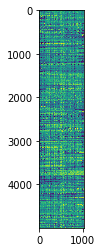

In [60]:
# img=mpimg.imread('your_image.png')
imgX = plt.imshow(X)
plt.show()

In [20]:
img = imread('four0.jpg')
# print(type(img))
# print(img.shape)
X_img = pd.DataFrame(img)
print(X_img)

    0   1   2   3   4   5   6    7    8    9   ...   18   19   20  21  22  23  \
0    0   0   0   0   0   0   0    0    0   10  ...    0    6    1   0   6   0   
1    0   0   0   0   0   0   0    0    0    0  ...    4    0    0   9   0   3   
2    0   0   0   0   0   0   0    0    3    0  ...    0    2    0   0   0   7   
3    0   0   0   0   0   0   0    0    0   12  ...    0    0   12   0   0  10   
4    0   0   0   0   0   0   0    0    0   10  ...    0    1    0   0  15   0   
5    0   0   0   0   0   0   0    0    0    0  ...    0   76   31   0   0   0   
6    0   0   0   0   0   0   0    0   11    0  ...    4  141  161  13   0   8   
7    0   0   0   0   0   0   0    0    0    3  ...    0   99  220   8   2   0   
8    3   0   2   0   1   0   0    0    6   57  ...    0  119  241  24  21   0   
9    0   0   3   0   3   5   0    0   39  237  ...    0  197  255  25   0   0   
10   0   2   4   0   1   8   0   14  184  245  ...   29  255  250  21   0   5   
11   0   3   3   0   0   0  

In [26]:
#Normalize data by subtracting mean and scaling
img_norm = normalize(X_img)
img_norm[5, ]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.26255399, 0.88929578, 0.12280751, 0.05505164, 0.02540845,
       0.        , 0.        , 0.02540845, 0.        , 0.32184038,
       0.131277  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [25]:
#Normalize data by subtracting mean and scaling
X_norm = normalize(X)
X_norm[5, ]
# print(" Printing [X_norm] ..")
# print(X_norm.shape)
# print
# print(" ---- ")

array([0.04698785, 0.04542507, 0.04698785, ..., 0.02901588, 0.02979727,
       0.03057866])

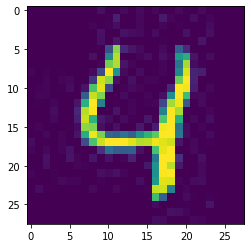

In [36]:
# img=mpimg.imread('your_image.png')
imgplot = plt.imshow(img)
plt.show()

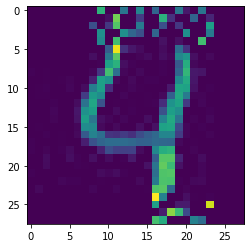

In [37]:
imgplot2 = plt.imshow(img_norm)
plt.show()

In [58]:
##### Disini
# NB: ValueError: n_components=29 must be between 0 and min(n_samples, n_features)=28 
pca = PCA(n_components=29)
#Run PCA on normalized image data
lower_dimension_data = pca.fit_transform(img_norm)
# lower_dimension_data


#Project lower dimension data onto original features
approximation = pca.inverse_transform(lower_dimension_data)


#Reshape approximation and X_norm to 5000x32x32 to display images
# approximation = approximation.reshape(-1,32,32)
# img_norm = img_norm.reshape(-1,32,32)

imgplot4 = plt.imshow(approximation)
plt.show()

ValueError: n_components=29 must be between 0 and min(n_samples, n_features)=28 with svd_solver='full'

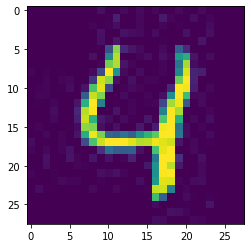

In [47]:
# img=mpimg.imread('your_image.png')
imgplot3 = plt.imshow(img)
plt.show()


                                      

IndexError: too many indices for array

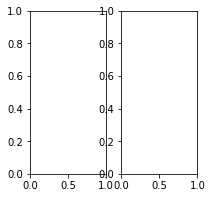

In [34]:
#Display images
# fig4, axarr = plt.subplots(3,2,figsize=(8,8))
fig4, axarr = plt.subplots(1,2,figsize=(3,3))
axarr[0,0].imshow(img_norm,cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(img_norm,cmap='gray')
axarr[0,1].set_title('99% Variation')
axarr[0,1].axis('off')

# axarr[1,0].imshow(X_norm[1,],cmap='gray')
# axarr[1,0].set_title('Original Image')
# axarr[1,0].axis('off')
# axarr[1,1].imshow(approximation[1,],cmap='gray')
# axarr[1,1].set_title('99% Variation')
# axarr[1,1].axis('off')
# axarr[2,0].imshow(X_norm[2,],cmap='gray')
# axarr[2,0].set_title('Original Image')
# axarr[2,0].axis('off')
# axarr[2,1].imshow(approximation[2,],cmap='gray')
# axarr[2,1].set_title('99% variation')
# axarr[2,1].axis('off')
plt.show()
